# <font color = "Green"> This notebook is a comprehensive program used for data preprocesssing and build models for Predicting EV Buying Intention

# <font color= "Indigo">Project Team:
<ol>
  <font color= "Indigo"><li>Gayathri Shanmugam</li>
  <li>Kayalvizhi Vellaichamy</li>
  <li>Nitya Malladi</li>
    <li>Saranya Anandan</li>
</ol>

### Context
The global auto manufacturing industry is undergoing rapid transformation by shifting focus from fuel-based vehicles to zero-emission vehicles (ZEVs). ZEVs are further categorized into battery electric vehicles and hydrogen fuel cell electric vehicles. In the United States, the federal government has mandated that at least 50% of the total cars sold should belong to the zero-emission category by the year 2030.
The scope of this project is to build a predictive model which classifies EV buyers in the United States based on their socio-demographic characteristics and their views on the current EV ecosystem. As per a recent survey, 53% of American vehicle users continue to prefer the traditional fuel-based vehicles over electric vehicles.This is a concerning issue for the government, auto companies and their dealers, and needs to be addressed by classifying an EV buyer from a non-buyer. Once the non-buyers are identified, focused strategies can be implemented to convert them into EV buyers

### Data attribute information


In [ ]:
conda install -c conda-forge lightgbm

### Import required packages.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from mord import LogisticIT

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import statsmodels.api as sm


from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, exhaustive_search 
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

no display found. Using non-interactive Agg backend


## Loading dataset

In [2]:
# Create data frame for EV data set.
EV_intention_df = pd.read_csv('AfterMerge_Dataset.csv')

# Display the first 10 records of EV_intention_df data frame.
print(EV_intention_df.head(10))


   bichoice  range  home_chg  work_chg  town  highway  gender          state  \
0         0      1         3         1     3        2       0  Massachusetts   
1         0      4         3         3     4        2       0  Massachusetts   
2         0      2         5         0     2        4       0  Massachusetts   
3         0      4         5         0     1        1       0  Massachusetts   
4         0      1         5         0     1        2       0  Massachusetts   
5         0      3        20        10     2        4       0  Massachusetts   
6         1      3         1         1     3        2       0  Massachusetts   
7         0      1         3         3     4        2       0  Massachusetts   
8         0      1         3         5     4        1       0  Massachusetts   
9         0      2         5        20     3        4       0  Massachusetts   

   Region  education  ...  home_parking  home_evse  work_parking  work_evse  \
0       1          4  ...             3 

# Data preprocessing

### Understanding the shape of the dataset

In [3]:
# Determine dimensions of dataframe. 
print('Dimensions of dataframe:',EV_intention_df.shape )
# It has 5898 rows and 27 columns.

Dimensions of dataframe: (5898, 27)


In [4]:
EV_intention_df.duplicated().sum()


0

In [5]:
EV_intention_df.isna().sum()

bichoice        0
range           0
home_chg        0
work_chg        0
town            0
highway         0
gender          0
state           0
Region          0
education       0
employment      0
hsincome        0
hsize           0
housit          0
residence       0
all_cars        0
ev_cars         0
home_parking    0
home_evse       0
work_parking    0
work_evse       0
buycar          0
zipcode         0
dmileage        0
long_dist       0
Age_category    0
RUCA            0
dtype: int64

### Check the data types of the columns for the dataset.

In [6]:
# Display column data types in the dataframe
print('Datatypes of all the columns in the dataset')
print(EV_intention_df.info())
EV_intention_df.describe().T

Datatypes of all the columns in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bichoice      5898 non-null   int64 
 1   range         5898 non-null   int64 
 2   home_chg      5898 non-null   int64 
 3   work_chg      5898 non-null   int64 
 4   town          5898 non-null   int64 
 5   highway       5898 non-null   int64 
 6   gender        5898 non-null   int64 
 7   state         5898 non-null   object
 8   Region        5898 non-null   int64 
 9   education     5898 non-null   int64 
 10  employment    5898 non-null   int64 
 11  hsincome      5898 non-null   int64 
 12  hsize         5898 non-null   int64 
 13  housit        5898 non-null   int64 
 14  residence     5898 non-null   int64 
 15  all_cars      5898 non-null   int64 
 16  ev_cars       5898 non-null   int64 
 17  home_parking  5898 non-null   int64 
 18  home

count          mean           std     min      25%      50%  \
bichoice      5898.0      0.550017      0.497534     0.0      0.0      1.0   
range         5898.0      2.507460      1.112326     1.0      2.0      3.0   
home_chg      5898.0      5.943371      6.602592     0.0      1.0      3.0   
work_chg      5898.0      5.899627      6.574685     0.0      1.0      3.0   
town          5898.0      2.504408      1.124472     1.0      1.0      3.0   
highway       5898.0      2.502204      1.115089     1.0      2.0      2.0   
gender        5898.0      0.503561      0.500030     0.0      0.0      1.0   
Region        5898.0      2.899288      1.367156     1.0      2.0      3.0   
education     5898.0      2.703967      0.839617     1.0      2.0      3.0   
employment    5898.0      1.659207      1.291301     1.0      1.0      1.0   
hsincome      5898.0      1.793489      0.886894     1.0      1.0      2.0   
hsize         5898.0      2.672431      1.314606     1.0      2.0      2.0   
housit        5898.0      1.460834      0.620362     1.0      1.0      1.0   
residence     5898.0      2.031536      1.717753     1.0      1.0      1.0   
all_cars      5898.0      1.582909      0.719641     1.0      1.0      1.0   
ev_cars       5898.0      0.078332      0.297468     0.0      0.0      0.0   
home_parking  5898.0      3.323499      1.865167     1.0      1.0      3.0   
home_evse     5898.0      1.835198      0.445773     1.0      2.0      2.0   
work_parking  5898.0      2.654120      1.400017     1.0      2.0      2.0   
work_evse     5898.0      1.962360      0.608242     1.0      2.0      2.0   
buycar        5898.0      1.777213      0.854842     1.0      1.0      1.0   
zipcode       5898.0  52330.798576  29095.128072  1247.0  29483.0  48073.0   
dmileage      5898.0     24.750763     20.347513     0.0     10.0     20.0   
long_dist     5898.0      1.486267      1.316556     0.0      0.0      1.0   
Age_category  5898.0      1.949135      0.867394     1.0      1.0      2.0   
RUCA          5898.0      1.214649      0.586181     1.0      1.0      1.0   

                  75%      max  
bichoice          1.0      1.0  
range             3.0      4.0  
home_chg         10.0     20.0  
work_chg         10.0     20.0  
town              4.0      4.0  
highway           3.0      4.0  
gender            1.0      1.0  
Region            4.0      5.0  
education         3.0      4.0  
employment        2.0      6.0  
hsincome          2.0      5.0  
hsize             4.0      5.0  
housit            2.0      4.0  
residence         2.0      8.0  
all_cars          2.0      4.0  
ev_cars           0.0      4.0  
home_parking      5.0      6.0  
home_evse         2.0      3.0  
work_parking      4.0      6.0  
work_evse         2.0      3.0  
buycar            3.0      3.0  
zipcode       78258.0  99703.0  
dmileage         30.0    100.0  
long_dist         2.0      4.0  
Age_category      2.0      4.0  
RUCA              1.0      4.0

- There are no null values
- All columns are integer type except state which is of object datatype
- Some of the attributes need the conversion into their equivalent dummy values

In [7]:
# Display column data types in the dataframe before modification
print('Original Column data types')
print(EV_intention_df.dtypes)

Original Column data types
bichoice         int64
range            int64
home_chg         int64
work_chg         int64
town             int64
highway          int64
gender           int64
state           object
Region           int64
education        int64
employment       int64
hsincome         int64
hsize            int64
housit           int64
residence        int64
all_cars         int64
ev_cars          int64
home_parking     int64
home_evse        int64
work_parking     int64
work_evse        int64
buycar           int64
zipcode          int64
dmileage         int64
long_dist        int64
Age_category     int64
RUCA             int64
dtype: object


In [8]:
#for one hot encoding all the nominal variables
# Need to change all the variables with multiple classes to 'category'datatype 
EV_intention_df.gender = EV_intention_df.gender.astype('category')
EV_intention_df.state = EV_intention_df.state.astype('category')
EV_intention_df.employment = EV_intention_df.employment.astype('category')
EV_intention_df.hsize = EV_intention_df.hsize.astype('category')
EV_intention_df.housit = EV_intention_df.housit.astype('category')
EV_intention_df.residence = EV_intention_df.residence.astype('category')
EV_intention_df.zipcode = EV_intention_df.zipcode.astype('category')
EV_intention_df.buycar = EV_intention_df.buycar.astype('category')
EV_intention_df.home_evse = EV_intention_df.home_evse.astype('category')
EV_intention_df.work_evse = EV_intention_df.work_evse.astype('category')
EV_intention_df.town = EV_intention_df.town.astype('category')
EV_intention_df.highway = EV_intention_df.highway.astype('category')
EV_intention_df.home_parking = EV_intention_df.home_parking.astype('category')
EV_intention_df.work_parking = EV_intention_df.work_parking.astype('category')
EV_intention_df.RUCA = EV_intention_df.RUCA.astype('category')
EV_intention_df.Region = EV_intention_df.Region.astype('category')

# Display category levels (attributes) and category type.
print(' ')
print('Category levels and changed variable type:')
print(EV_intention_df.gender.cat.categories)
print(EV_intention_df.gender.dtype)
print(EV_intention_df.state.cat.categories)
print(EV_intention_df.state.dtype)
print(EV_intention_df.employment.cat.categories)
print(EV_intention_df.employment.dtype)
print(EV_intention_df.hsize.cat.categories)
print(EV_intention_df.hsize.dtype)
print(EV_intention_df.housit.cat.categories)
print(EV_intention_df.housit.dtype)
print(EV_intention_df.residence.cat.categories)
print(EV_intention_df.residence.dtype)
print(EV_intention_df.zipcode.cat.categories)
print(EV_intention_df.zipcode.dtype)
print(EV_intention_df.buycar.cat.categories)
print(EV_intention_df.buycar.dtype)
print(EV_intention_df.home_evse.cat.categories)
print(EV_intention_df.home_evse.dtype)
print(EV_intention_df.work_evse.cat.categories)
print(EV_intention_df.work_evse.dtype)
print(EV_intention_df.town.cat.categories)
print(EV_intention_df.town.dtype)
print(EV_intention_df.highway.cat.categories)
print(EV_intention_df.highway.dtype)
print(EV_intention_df.home_parking.cat.categories)
print(EV_intention_df.home_parking.dtype)
print(EV_intention_df.work_parking.cat.categories)
print(EV_intention_df.work_parking.dtype)
print(EV_intention_df.RUCA.cat.categories)
print(EV_intention_df.RUCA.dtype)
print(EV_intention_df.Region.cat.categories)
print(EV_intention_df.Region.dtype)

 
Category levels and changed variable type:
Int64Index([0, 1], dtype='int64')
category
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object')
category
Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5], dtype='int64')
category
Int64Index([1, 2, 3, 4], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5, 6, 8], dtype='int64')

In [9]:
#one hot encoding the nominal variables along with state and zipcode
onehot_encoded_columns= ['gender','state','employment','hsize','housit','residence','zipcode',
                                               'RUCA','buycar','town','highway','home_evse','work_parking','home_parking','work_evse','Region']

encoder = OneHotEncoder(sparse=False, categories='auto')
# transform data
onehot_encoded_data = encoder.fit_transform(EV_intention_df[onehot_encoded_columns])

#Convert it to df
onehot_encoded_data_df = pd.DataFrame(onehot_encoded_data, index=EV_intention_df.index)
onehot_encoded_data_df.columns = encoder.get_feature_names(['gender','state','employment','hsize','housit','residence','zipcode',
                                               'RUCA','buycar','town','highway','home_evse','work_parking','home_parking','work_evse','Region'])

#Extract only the columns that didnt need to be encoded
data_other_cols = EV_intention_df.drop(columns=onehot_encoded_columns)

#Concatenate the two dataframes : 
data_input = pd.concat([onehot_encoded_data_df, data_other_cols], axis=1)
print(data_input)
data_input.shape


      gender_0  gender_1  state_Alabama  state_Alaska  state_Arizona  \
0          1.0       0.0            0.0           0.0            0.0   
1          1.0       0.0            0.0           0.0            0.0   
2          1.0       0.0            0.0           0.0            0.0   
3          1.0       0.0            0.0           0.0            0.0   
4          1.0       0.0            0.0           0.0            0.0   
...        ...       ...            ...           ...            ...   
5893       1.0       0.0            0.0           1.0            0.0   
5894       1.0       0.0            0.0           1.0            0.0   
5895       1.0       0.0            0.0           1.0            0.0   
5896       1.0       0.0            0.0           1.0            0.0   
5897       1.0       0.0            0.0           1.0            0.0   

      state_Arkansas  state_California  state_Colorado  state_Connecticut  \
0                0.0               0.0             0.0    

(5898, 1051)

In [10]:
# Display column data types in the dataframe after modification
print('Modified Column data types')
print(data_input.dtypes)

Modified Column data types
gender_0         float64
gender_1         float64
state_Alabama    float64
state_Alaska     float64
state_Arizona    float64
                  ...   
all_cars           int64
ev_cars            int64
dmileage           int64
long_dist          int64
Age_category       int64
Length: 1051, dtype: object


### Data summary

In [11]:
# Use describe() function to display column statistics for the entire data set. 
np.round(data_input.describe(), decimals=2).T

count   mean    std  min   25%   50%   75%    max
gender_0       5898.0   0.50   0.50  0.0   0.0   0.0   1.0    1.0
gender_1       5898.0   0.50   0.50  0.0   0.0   1.0   1.0    1.0
state_Alabama  5898.0   0.02   0.12  0.0   0.0   0.0   0.0    1.0
state_Alaska   5898.0   0.00   0.06  0.0   0.0   0.0   0.0    1.0
state_Arizona  5898.0   0.03   0.17  0.0   0.0   0.0   0.0    1.0
...               ...    ...    ...  ...   ...   ...   ...    ...
all_cars       5898.0   1.58   0.72  1.0   1.0   1.0   2.0    4.0
ev_cars        5898.0   0.08   0.30  0.0   0.0   0.0   0.0    4.0
dmileage       5898.0  24.75  20.35  0.0  10.0  20.0  30.0  100.0
long_dist      5898.0   1.49   1.32  0.0   0.0   1.0   2.0    4.0
Age_category   5898.0   1.95   0.87  1.0   1.0   2.0   2.0    4.0

[1051 rows x 8 columns]

### Data splitting and scaling


In [12]:
#Develop predictors X and output variable Y for the data set.
X = data_input.drop(columns=['bichoice'])
y = data_input['bichoice']

# Develop training (60%) and validation(40% or 0.4) partitions for
# heart_disease_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)

Training :  (4128, 1050)
Validation :  (1770, 1050)


In [13]:
print('Predictors list')
print(X.columns)

Predictors list
Index(['gender_0', 'gender_1', 'state_Alabama', 'state_Alaska',
       'state_Arizona', 'state_Arkansas', 'state_California', 'state_Colorado',
       'state_Connecticut', 'state_Delaware',
       ...
       'range', 'home_chg', 'work_chg', 'education', 'hsincome', 'all_cars',
       'ev_cars', 'dmileage', 'long_dist', 'Age_category'],
      dtype='object', length=1050)


In [14]:
scaler = StandardScaler()

In [15]:
# Note the use of an array of column names.
scaler.fit(train_X[['all_cars', 'ev_cars','dmileage','long_dist','home_chg','work_chg',
                            'Age_category','education','hsincome','range']])  


StandardScaler()

In [16]:
# Transform the full data set into standardized (normalized) data set. 
#train_X.reset_index(drop=True,inplace=True)
train_X = pd.concat([pd.DataFrame(scaler.transform(train_X[['all_cars', 'ev_cars','dmileage','long_dist','home_chg','work_chg',
                            'Age_category','education','hsincome','range']]), 
                                    columns=['zall_cars', 'zev_cars','zdmileage','zlong_dist','zhome_chg','zwork_chg',
                            'zAge_category','zeducation','zhsincome','zrange'],index=train_X.index),
                       train_X ], axis=1)
print('Standardized (Normalized) Values of EV Intention Data Set')
print()
print(train_X)

Standardized (Normalized) Values of EV Intention Data Set

      zall_cars  zev_cars  zdmileage  zlong_dist  zhome_chg  zwork_chg  \
5495  -0.809059 -0.260629  -0.717320   -0.358507  -0.150337  -0.126720   
2146  -0.809059 -0.260629  -0.473869   -1.111646   0.602443  -0.587059   
1893  -0.809059 -0.260629   3.664801    1.900909  -0.602005   2.174977   
4741  -0.809059 -0.260629  -0.960771   -1.111646   0.602443  -0.433613   
1686  -0.809059 -0.260629   0.256485    0.394632   0.602443  -0.126720   
...         ...       ...        ...         ...        ...        ...   
905    0.590688 -0.260629  -0.473869   -1.111646  -0.602005   2.174977   
5192  -0.809059 -0.260629   1.717192   -1.111646   0.602443  -0.126720   
3980   1.990435 -0.260629   0.986838   -0.358507  -0.150337  -0.126720   
235    0.590688 -0.260629   0.013034   -1.111646   2.108003  -0.126720   
5157   0.590688 -0.260629   0.256485    0.394632  -0.451449  -0.893952   

      zAge_category  zeducation  zhsincome    zrange

In [17]:
# Transform the full data set into standardized (normalized) data set. 
#valid_X.reset_index(drop=True,inplace=True)
valid_X = pd.concat([pd.DataFrame(scaler.transform(valid_X[['all_cars', 'ev_cars','dmileage','long_dist','home_chg','work_chg',
                            'Age_category','education','hsincome','range']]), 
                                    columns=['zall_cars', 'zev_cars','zdmileage','zlong_dist','zhome_chg','zwork_chg',
                            'zAge_category','zeducation','zhsincome','zrange'],index=valid_X.index),
                       valid_X ], axis=1)
print('Standardized (Normalized) Values of EV Intention Data Set')
print()
print(valid_X)

Standardized (Normalized) Values of EV Intention Data Set

      zall_cars  zev_cars  zdmileage  zlong_dist  zhome_chg  zwork_chg  \
573    0.590688 -0.260629  -0.473869   -0.358507  -0.903117  -0.433613   
3219   1.990435 -0.260629  -0.230418   -1.111646   2.108003  -0.740506   
4436   0.590688 -0.260629  -0.960771    0.394632   2.108003  -0.587059   
3887  -0.809059 -0.260629  -0.473869   -0.358507   0.602443   2.174977   
3656  -0.809059 -0.260629   0.256485   -1.111646  -0.150337   0.640513   
...         ...       ...        ...         ...        ...        ...   
3321  -0.809059 -0.260629  -0.717320   -1.111646  -0.602005  -0.126720   
2105  -0.809059 -0.260629  -0.230418   -1.111646  -0.451449  -0.740506   
710   -0.809059 -0.260629  -0.473869    0.394632  -0.602005   2.174977   
4302  -0.809059 -0.260629   1.717192    0.394632  -0.602005  -0.126720   
3201   0.590688 -0.260629  -0.230418    0.394632  -0.602005   0.640513   

      zAge_category  zeducation  zhsincome    zrange

In [18]:
train_X_s = train_X.drop(columns= ['all_cars', 'ev_cars','dmileage','long_dist','home_chg','work_chg',
                            'Age_category','education','hsincome','range'])
print(train_X_s)

valid_X_s = valid_X.drop(columns= ['all_cars', 'ev_cars','dmileage','long_dist','home_chg','work_chg',
                            'Age_category','education','hsincome','range'])
print(valid_X_s)



      zall_cars  zev_cars  zdmileage  zlong_dist  zhome_chg  zwork_chg  \
5495  -0.809059 -0.260629  -0.717320   -0.358507  -0.150337  -0.126720   
2146  -0.809059 -0.260629  -0.473869   -1.111646   0.602443  -0.587059   
1893  -0.809059 -0.260629   3.664801    1.900909  -0.602005   2.174977   
4741  -0.809059 -0.260629  -0.960771   -1.111646   0.602443  -0.433613   
1686  -0.809059 -0.260629   0.256485    0.394632   0.602443  -0.126720   
...         ...       ...        ...         ...        ...        ...   
905    0.590688 -0.260629  -0.473869   -1.111646  -0.602005   2.174977   
5192  -0.809059 -0.260629   1.717192   -1.111646   0.602443  -0.126720   
3980   1.990435 -0.260629   0.986838   -0.358507  -0.150337  -0.126720   
235    0.590688 -0.260629   0.013034   -1.111646   2.108003  -0.126720   
5157   0.590688 -0.260629   0.256485    0.394632  -0.451449  -0.893952   

      zAge_category  zeducation  zhsincome    zrange  ...  home_parking_5  \
5495       1.206933   -0.844223  -

# PCA

In [19]:
pca = PCA()

In [20]:
pca.fit(train_X_s)

PCA()

In [21]:
print(pca.explained_variance_ratio_)

[9.20257547e-02 6.41010094e-02 5.64215956e-02 ... 6.02922584e-37
 5.06910210e-37 1.35865749e-37]


In [22]:
np.sum(pca.explained_variance_ratio_[0:200])

0.9640344432626989

In [23]:
np.sum(pca.explained_variance_ratio_[0:250])

0.967419013815954

In [24]:
np.sum(pca.explained_variance_ratio_[0:150])

0.9604542968004686

In [25]:
np.sum(pca.explained_variance_ratio_[0:100])

0.9555564312939815

In [26]:
np.sum(pca.explained_variance_ratio_[0:75])

0.9452859496659134

In [27]:
np.sum(pca.explained_variance_ratio_[0:50])

0.9130874282532231

In [28]:
#selecting 200 components using PCA
pca200=PCA(n_components=200)
pca200.fit(train_X_s)
train_X_pca200 = pd.DataFrame(pca200.transform(train_X_s))
valid_X_pca200 = pd.DataFrame(pca200.transform(valid_X_s))
#train_X_pca200.to_csv('train_X_pca200.csv', index_label='index')
#valid_X_pca200.to_csv('valid_X_pca200.csv', index_label='index')

In [29]:
train_X_pca200

0         1         2         3         4         5         6    \
0    -1.502169 -0.309869  1.215257  0.080337  1.325458  0.796979  0.748290   
1    -1.371014 -0.467296 -0.019584  0.350626  0.340836  0.165332  0.544387   
2     1.157636  3.249130  0.616573 -2.374154  2.244488 -0.994703 -1.200126   
3    -1.063559 -2.124867  1.640055 -0.474900  0.416713  0.409579  1.417827   
4    -0.230944  1.154466 -0.685641 -0.341180 -0.455292 -0.479735  0.546156   
...        ...       ...       ...       ...       ...       ...       ...   
4123 -0.219424 -0.528187 -1.063134  1.189917 -0.134921 -1.245642 -2.237719   
4124 -1.308304  1.676825 -0.302558  0.772091 -0.126368 -0.551209 -0.280626   
4125  0.879105  0.428888  1.760091  2.343970 -1.264814 -0.199402 -1.090988   
4126 -0.214847 -1.325529  1.279351 -0.209390 -0.397513 -1.389851  1.668492   
4127 -0.157494  0.123406  1.797811  0.240315  0.005705  0.983345  0.142852   

           7         8         9    ...       190       191       192  \
0    -0.339349 -0.150820 -0.726875  ...  0.006019  0.000485 -0.019839   
1    -1.621149  0.453595  0.595731  ...  0.003885  0.000903 -0.000201   
2    -0.482439  1.149818  0.845591  ... -0.000413 -0.007218  0.002044   
3     0.614576  0.628789 -0.067551  ...  0.019905 -0.024892 -0.012885   
4     0.106489 -0.058384  0.693459  ...  0.004092  0.001551 -0.039692   
...        ...       ...       ...  ...       ...       ...       ...   
4123  1.011420  1.012818 -0.702570  ... -0.076702  0.015609  0.000706   
4124 -1.758363  1.917987  0.767883  ... -0.032841 -0.042322 -0.022694   
4125 -0.544936  0.481614  0.086235  ... -0.034553  0.010481 -0.019145   
4126  0.453367  0.414948  0.788325  ...  0.005202  0.001345 -0.002760   
4127 -0.620243 -0.438907 -0.025433  ... -0.012274 -0.067932  0.026634   

           193       194       195       196       197       198       199  
0    -0.003448 -0.003137 -0.001164  0.005556 -0.002020  0.002637  0.006279  
1    -0.000358 -0.004147  0.000235  0.000268  0.000061 -0.000308  0.000541  
2    -0.028405 -0.021315  0.023884 -0.008734  0.017930  0.018351 -0.017719  
3     0.010808  0.023594 -0.054319 -0.058223 -0.036469  0.008639  0.043696  
4    -0.006260 -0.045345  0.016463  0.002121  0.004907 -0.010794  0.005225  
...        ...       ...       ...       ...       ...       ...       ...  
4123 -0.009956 -0.015568 -0.045520  0.001328 -0.027355  0.001669  0.008477  
4124 -0.056105 -0.051439  0.036430 -0.043108 -0.004145 -0.026462  0.062250  
4125 -0.009619  0.006074  0.026571  0.027893 -0.004922 -0.036433  0.019299  
4126 -0.002571  0.001292  0.003324  0.004390  0.004633  0.000418  0.001060  
4127 -0.064041 -0.124885  0.041085  0.017853 -0.032519 -0.016457  0.044503  

[4128 rows x 200 columns]

In [30]:
train_X_pca200.head()

0         1         2         3         4         5         6    \
0 -1.502169 -0.309869  1.215257  0.080337  1.325458  0.796979  0.748290   
1 -1.371014 -0.467296 -0.019584  0.350626  0.340836  0.165332  0.544387   
2  1.157636  3.249130  0.616573 -2.374154  2.244488 -0.994703 -1.200126   
3 -1.063559 -2.124867  1.640055 -0.474900  0.416713  0.409579  1.417827   
4 -0.230944  1.154466 -0.685641 -0.341180 -0.455292 -0.479735  0.546156   

        7         8         9    ...       190       191       192       193  \
0 -0.339349 -0.150820 -0.726875  ...  0.006019  0.000485 -0.019839 -0.003448   
1 -1.621149  0.453595  0.595731  ...  0.003885  0.000903 -0.000201 -0.000358   
2 -0.482439  1.149818  0.845591  ... -0.000413 -0.007218  0.002044 -0.028405   
3  0.614576  0.628789 -0.067551  ...  0.019905 -0.024892 -0.012885  0.010808   
4  0.106489 -0.058384  0.693459  ...  0.004092  0.001551 -0.039692 -0.006260   

        194       195       196       197       198       199  
0 -0.003137 -0.001164  0.005556 -0.002020  0.002637  0.006279  
1 -0.004147  0.000235  0.000268  0.000061 -0.000308  0.000541  
2 -0.021315  0.023884 -0.008734  0.017930  0.018351 -0.017719  
3  0.023594 -0.054319 -0.058223 -0.036469  0.008639  0.043696  
4 -0.045345  0.016463  0.002121  0.004907 -0.010794  0.005225  

[5 rows x 200 columns]

In [31]:
valid_X_pca200.head()

0         1         2         3         4         5         6    \
0  0.487695 -0.810356  0.039301  0.172799 -0.422539  0.924272 -0.280875   
1  1.247108 -2.311188 -0.343549 -0.061982 -1.001228 -1.402939  1.047236   
2  0.089932  0.000954 -0.506735  1.432019 -1.886871 -1.671730  0.692599   
3 -0.617586 -0.493937 -0.889388 -0.069560  1.125120 -1.757604 -0.864415   
4 -1.520015  0.237543 -1.141122 -0.850043  0.958202 -0.251215 -0.454745   

        7         8         9    ...       190       191       192       193  \
0  0.702943 -0.130957 -0.193097  ... -0.008539 -0.002111 -0.009331  0.005979   
1 -1.147629 -0.493571  0.565946  ...  0.033652  0.018759  0.006563 -0.004473   
2 -0.535234 -0.819607 -0.309176  ...  0.031346 -0.018462 -0.016025  0.025398   
3  0.182110  0.109818 -0.300378  ... -0.008637 -0.003832 -0.001300  0.014514   
4 -0.862785  0.288212  0.504205  ...  0.002722 -0.017386 -0.025184 -0.037716   

        194       195       196       197       198       199  
0 -0.000679  0.006072  0.010319 -0.015058 -0.018378 -0.005518  
1  0.014045  0.015163 -0.009827 -0.025127  0.009543  0.009101  
2 -0.041714  0.004882  0.030605 -0.110517  0.035445 -0.090705  
3  0.008983 -0.004045  0.001827  0.008245 -0.021050  0.004002  
4  0.010818 -0.013672  0.006221 -0.011830  0.001893  0.004986  

[5 rows x 200 columns]

# <font color= "Green">BUILDING THE DATA MINING METHODS:
<ol>
  <font color= "Indigo"><li>Logistic Regression</li>
      <li>Classification Trees</li>
      <li>Random forest trees</li>
  <li>Boosted trees</li>
    <li>Neural Networks</li>
</ol>

## Logistic Regression 

In [32]:
# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# Parameter C=1e42 and penalty=l2 lead to ordinal logistic regression. 
# solver='liblinear' is used for automated selection of the best parameters
# of the logistis regression; recommended for large-scale classification.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X_pca200, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=train_X_pca200.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 0.277
Coefficients for Predictors
          0     1      2     3     4      5      6      7      8      9    \
Coeff:  0.042  0.01 -0.326 -0.12  0.25  0.372  0.095 -0.245  0.017  0.042   

        ...    190    191    192    193    194    195    196    197    198  \
Coeff:  ... -1.253  2.407 -2.463  0.569  1.381  0.756  1.664  2.462 -2.718   

          199  
Coeff:  2.869  

[1 rows x 200 columns]


In [33]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X_pca200)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X_pca200), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
573        1               1  0.4056  0.5944
3219       1               1  0.4020  0.5980
4436       0               0  0.7362  0.2638
3887       1               1  0.1935  0.8065
3656       1               1  0.1664  0.8336
3680       1               0  0.5959  0.4041
1513       1               1  0.3415  0.6585
79         1               1  0.2873  0.7127
4072       1               1  0.4422  0.5578
3259       0               1  0.4983  0.5017
4765       0               1  0.1226  0.8774
5613       1               1  0.4642  0.5358
2754       1               0  0.6039  0.3961
5194       1               1  0.2536  0.7464
4809       0               0  0.7093  0.2907
850        1               1  0.4418  0.5582
689        0               1  0.4104  0.5896
4804       1               0  0.7267  0.2733
4451       1               0  0.5331  0.4669
2815       0               0  0.6619  0.3381


In [34]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, log_reg.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.6791668646713784


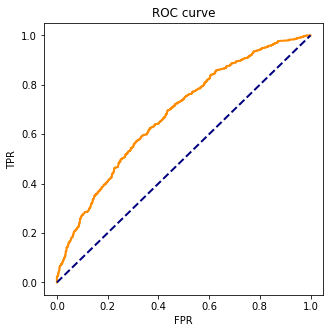

In [35]:
roc_auc_score(valid_y, log_reg.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, log_prob[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [36]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X_pca200))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X_pca200))
print(classification_report(valid_y, log_reg.predict(valid_X_pca200)))

Training Partition
Confusion Matrix (Accuracy 0.7008)

       Prediction
Actual    0    1
     0 1109  728
     1  507 1784

Validation Partition
Confusion Matrix (Accuracy 0.6350)

       Prediction
Actual   0   1
     0 435 382
     1 264 689
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       817
           1       0.64      0.72      0.68       953

    accuracy                           0.64      1770
   macro avg       0.63      0.63      0.63      1770
weighted avg       0.63      0.64      0.63      1770



<AxesSubplot:>

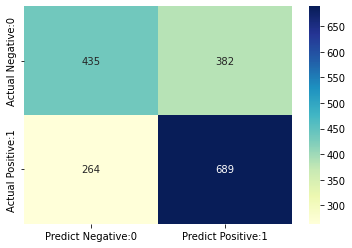

In [37]:
cm = confusion_matrix(valid_y, log_reg.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Logistic Regression with Grid search

In [52]:
# Identify grid search parameters. 
param_grid = {
    "penalty":["l1","l2"] ,"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer.
log_reg = LogisticRegression(C=1e42, solver='liblinear')
gridSearch_log = GridSearchCV(log_reg, 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch_log.fit(train_X_pca200, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch_log.best_score_:.4f}')
print('Best parameter: ', gridSearch_log.best_params_)

Best score:0.6613
Best parameter:  {'C': 1, 'penalty': 'l1'}


In [53]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred_g = gridSearch_log.predict(valid_X_pca200)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob_g = np.round(gridSearch_log.predict_proba(valid_X_pca200), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result_g = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred_g,
                    'p(0)': [p[0] for p in log_prob_g],
                    'p(1)': [p[1] for p in log_prob_g]
})

print('Classification for Validation Partition')
print(log_result_g.head(20))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
573        1               1  0.3981  0.6019
3219       1               1  0.4214  0.5786
4436       0               0  0.6716  0.3284
3887       1               1  0.2912  0.7088
3656       1               1  0.1724  0.8276
3680       1               0  0.5495  0.4505
1513       1               1  0.3115  0.6885
79         1               1  0.3020  0.6980
4072       1               1  0.4700  0.5300
3259       0               0  0.5099  0.4901
4765       0               1  0.1503  0.8497
5613       1               1  0.4978  0.5022
2754       1               0  0.5515  0.4485
5194       1               1  0.3141  0.6859
4809       0               0  0.7038  0.2962
850        1               1  0.4471  0.5529
689        0               1  0.3948  0.6052
4804       1               0  0.7173  0.2827
4451       1               0  0.5369  0.4631
2815       0               0  0.5761  0.4239


In [54]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_log.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.675881484868373


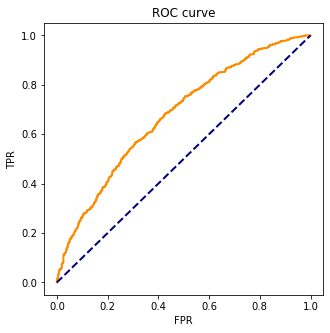

In [55]:
roc_auc_score(valid_y, gridSearch_log.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, log_prob_g[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [56]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, gridSearch_log.predict(train_X_pca200))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, gridSearch_log.predict(valid_X_pca200))
print(classification_report(valid_y, gridSearch_log.predict(valid_X_pca200)))

Training Partition
Confusion Matrix (Accuracy 0.6972)

       Prediction
Actual    0    1
     0 1095  742
     1  508 1783

Validation Partition
Confusion Matrix (Accuracy 0.6288)

       Prediction
Actual   0   1
     0 430 387
     1 270 683
              precision    recall  f1-score   support

           0       0.61      0.53      0.57       817
           1       0.64      0.72      0.68       953

    accuracy                           0.63      1770
   macro avg       0.63      0.62      0.62      1770
weighted avg       0.63      0.63      0.63      1770



<AxesSubplot:>

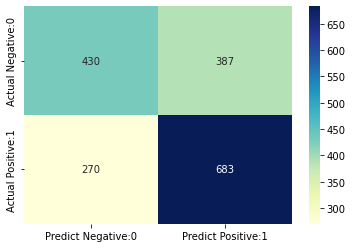

In [57]:
cm = confusion_matrix(valid_y, gridSearch_log.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# KNN Classifier

In [58]:
# Apply NearestNeighbors() function for k=3 in training 
# parition. 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X_pca200, train_y)

KNeighborsClassifier(n_neighbors=3)

In [59]:
# Make EV intention classification for validation set 
# using EV intention KNN model. 

# Use knn model to classify EV intention
# for validation set.
EV_pred_knn = knn.predict(valid_X_pca200)

# Predict EV intention probabilities p(0), p(1),
# and p(2) for validation set.
EV_pred_prob_knn = np.round(knn.predict_proba(valid_X_pca200), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
EV_pred_knn_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in EV_pred_prob_knn],
                'p(1)': [p[1] for p in EV_pred_prob_knn],
                'Classification': EV_pred_knn})

print('Classification for EV intention Data for Validation Partition')
print(EV_pred_knn_result.head(10))

Classification for EV intention Data for Validation Partition
      Actual    p(0)    p(1)  Classification
573        1  0.0000  1.0000               1
3219       1  0.0000  1.0000               1
4436       0  0.6667  0.3333               0
3887       1  0.3333  0.6667               1
3656       1  0.0000  1.0000               1
3680       1  0.3333  0.6667               1
1513       1  0.6667  0.3333               0
79         1  0.3333  0.6667               1
4072       1  0.6667  0.3333               0
3259       0  0.6667  0.3333               0


In [60]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, knn.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.778196406118153


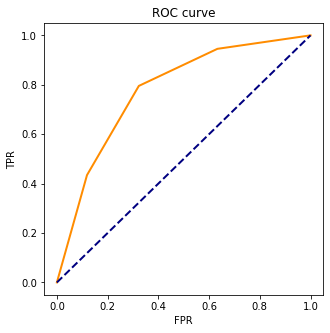

In [61]:
roc_auc_score(valid_y, knn.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, EV_pred_prob_knn[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [62]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, knn.predict(train_X_pca200))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, knn.predict(valid_X_pca200))
print(classification_report(valid_y, knn.predict(valid_X_pca200)))

Training Partition
Confusion Matrix (Accuracy 0.8697)

       Prediction
Actual    0    1
     0 1539  298
     1  240 2051

Validation Partition
Confusion Matrix (Accuracy 0.7407)

       Prediction
Actual   0   1
     0 553 264
     1 195 758
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       817
           1       0.74      0.80      0.77       953

    accuracy                           0.74      1770
   macro avg       0.74      0.74      0.74      1770
weighted avg       0.74      0.74      0.74      1770



In [63]:
# Identify best k value for number of nearest neighbors using 
# validation partition.

# Develop k-NN classifier using training partition for various
# values of k and then identify accuracy score using validation
# partition. Accuracy score (accuracy) means a probability of 
# correct predictions with the k-NN classifier. 
results = []
for k in range(1, 15):
    # Train knn classifier using training partition.
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X_pca200, train_y)
    results.append({
        'k': k,
        # For each k, identify accuracy score using validation 
        # partition.
        'Accuracy Score': accuracy_score(valid_y, knn.predict(valid_X_pca200))
    })

# Convert results to a pandas data frame. The smallest k value 
# with the highest accuracy is the best k to apply in k-NN 
# classifier. 
results = pd.DataFrame(results)
print(results)

     k  Accuracy Score
0    1        0.741808
1    2        0.702825
2    3        0.740678
3    4        0.721469
4    5        0.728249
5    6        0.702260
6    7        0.704520
7    8        0.688701
8    9        0.684746
9   10        0.679661
10  11        0.676271
11  12        0.681921
12  13        0.670621
13  14        0.663277


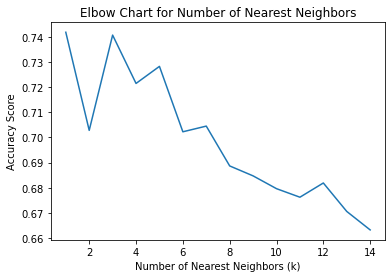

In [64]:
# Develop and display Elbow chart to compare accuracy_score with 
# number of nearest neighbors, k, from 1 to 20. 
ax = results.plot(x='k', y='Accuracy Score')
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('Accuracy Score')

plt.title('Elbow Chart for Number of Nearest Neighbors')
ax.legend().set_visible(False)
plt.show()

# KNN Classifier along with Grid search

In [70]:
# Identify grid search parameters. 
param_grid = {
    'n_neighbors': list(range(1, 31))
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer.
knn_g = KNeighborsClassifier()
gridSearch_knn = GridSearchCV(knn_g, 
                          param_grid, cv=5, n_jobs=-1,scoring='accuracy',return_train_score=True)
gridSearch_knn.fit(train_X_pca200, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch_knn.best_score_:.4f}')
print('Best parameter: ', gridSearch_knn.best_params_)

Best score:0.7224
Best parameter:  {'n_neighbors': 1}


In [71]:
# Make EV intention classification for validation set 
# using EV intention KNN model. 

# Use knn model to classify EV intention
# for validation set.
EV_pred_knn_g = gridSearch_knn.predict(valid_X_pca200)

# Predict EV intention probabilities p(0), p(1),
# and p(2) for validation set.
EV_pred_prob_knn_g = np.round(gridSearch_knn.predict_proba(valid_X_pca200), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
EV_pred_knn_result_g = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in EV_pred_prob_knn_g],
                'p(1)': [p[1] for p in EV_pred_prob_knn_g],
                'Classification': EV_pred_knn_g})

print('Classification for EV intention Data for Validation Partition')
print(EV_pred_knn_result_g.head(10))

Classification for EV intention Data for Validation Partition
      Actual  p(0)  p(1)  Classification
573        1   0.0   1.0               1
3219       1   0.0   1.0               1
4436       0   1.0   0.0               0
3887       1   0.0   1.0               1
3656       1   0.0   1.0               1
3680       1   0.0   1.0               1
1513       1   1.0   0.0               0
79         1   0.0   1.0               1
4072       1   1.0   0.0               0
3259       0   1.0   0.0               0


In [72]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_knn.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.7384841529872168


In [73]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, gridSearch_knn.predict(train_X_pca200))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, gridSearch_knn.predict(valid_X_pca200))
print(classification_report(valid_y, gridSearch_knn.predict(valid_X_pca200)))

Training Partition
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition
Confusion Matrix (Accuracy 0.7418)

       Prediction
Actual   0   1
     0 568 249
     1 208 745
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       817
           1       0.75      0.78      0.77       953

    accuracy                           0.74      1770
   macro avg       0.74      0.74      0.74      1770
weighted avg       0.74      0.74      0.74      1770



## <font color= "Orange">Different Classification Tree Models:
<ol>
  <font color= "Blue"><li>Full Classification tree</li>
      <li>Smaller Classification tree using random controlled parameters</li>
      <li>Smaller Classification tree using Grid Search results</li>
</ol>

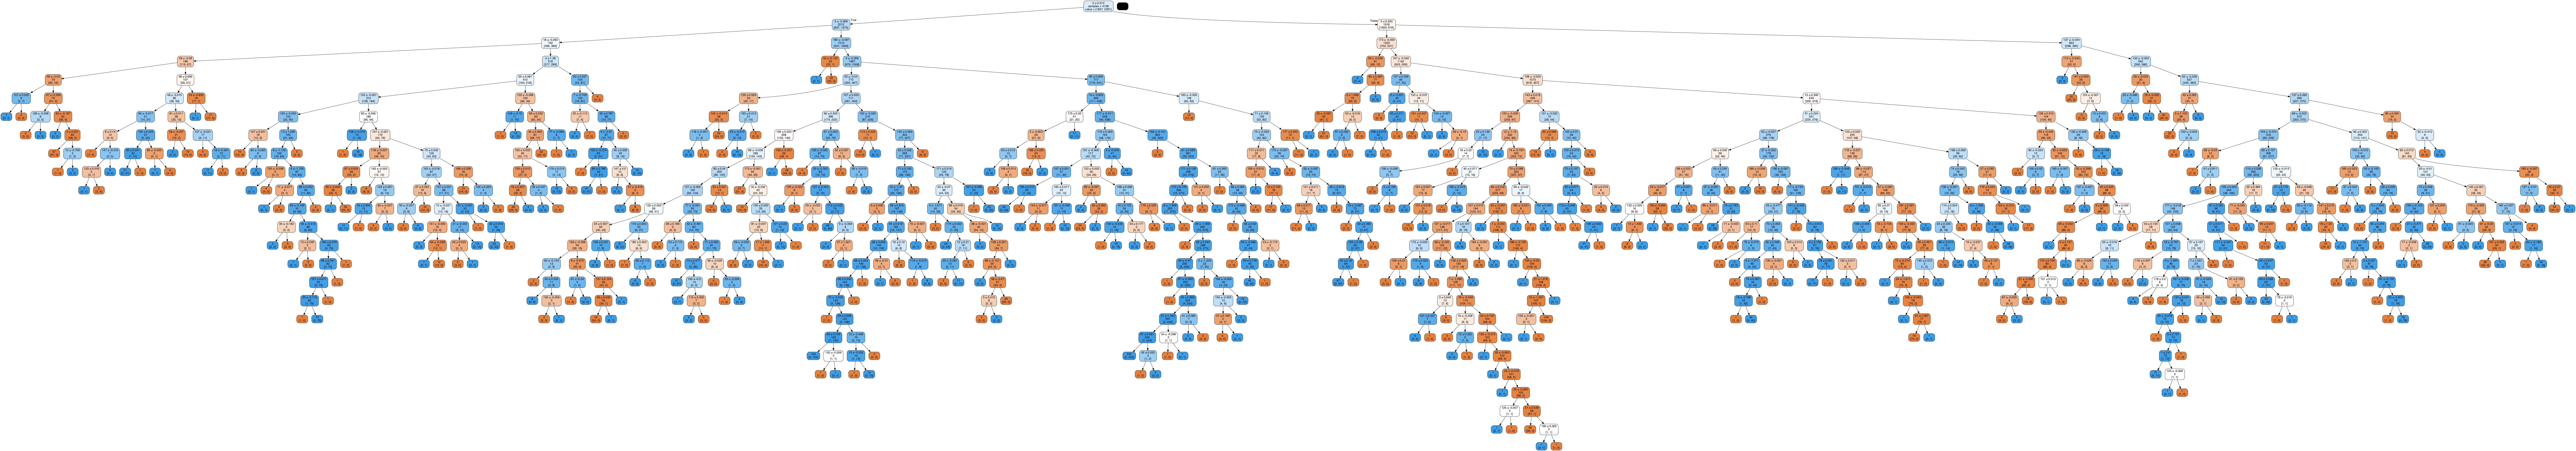

In [45]:
# Grow full classification tree using training partition.
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X_pca200, train_y)

# Using plotDecisionTree() to visualize the full tree.
plotDecisionTree(fullClassTree, feature_names=train_X_pca200.columns)

In [46]:
# Indetify and display number of nodes in the tree.
tree_nodes = fullClassTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 995


In [47]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, fullClassTree.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.6485125243866884


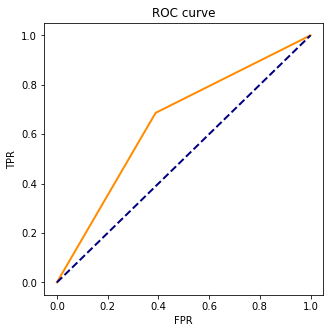

In [48]:
roc_auc_score(valid_y, fullClassTree.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, fullClassTree.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [49]:
# Confusion matrices for full classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, fullClassTree.predict(train_X_pca200))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, fullClassTree.predict(valid_X_pca200))
print(classification_report(valid_y, fullClassTree.predict(valid_X_pca200)))

#its a measure for classifictaion measurement
#o means non acceptance and 1 means accept
#287 predicted one and 2713 non accepr
#in valid,98% predicted correctly.1794 predicted correctly and 
#13 predicted incorrrectly(non accepted 13 predicted as accepted)
#166 predicted correctly and 27 predicted incorrectly
#down diagonal correct preedicton and other diagonal is incorrect

# accuracy=1794+166/2000=0.98
# misclassification(error)=27+13/2000=1-accuracy=0.02= 2%
#give idea of how many records are predicted coreect and incorrect in matrix

Training Partition
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition
Confusion Matrix (Accuracy 0.6514)

       Prediction
Actual   0   1
     0 499 318
     1 299 654
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       817
           1       0.67      0.69      0.68       953

    accuracy                           0.65      1770
   macro avg       0.65      0.65      0.65      1770
weighted avg       0.65      0.65      0.65      1770



<AxesSubplot:>

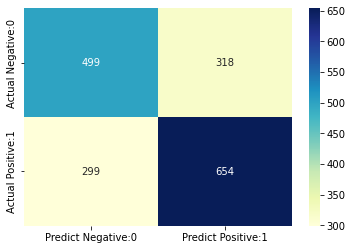

In [50]:
cm = confusion_matrix(valid_y, fullClassTree.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Smaller classification tree using DecisionTreeClassifier() control parameters

Small Classification Tree with Control Parameters


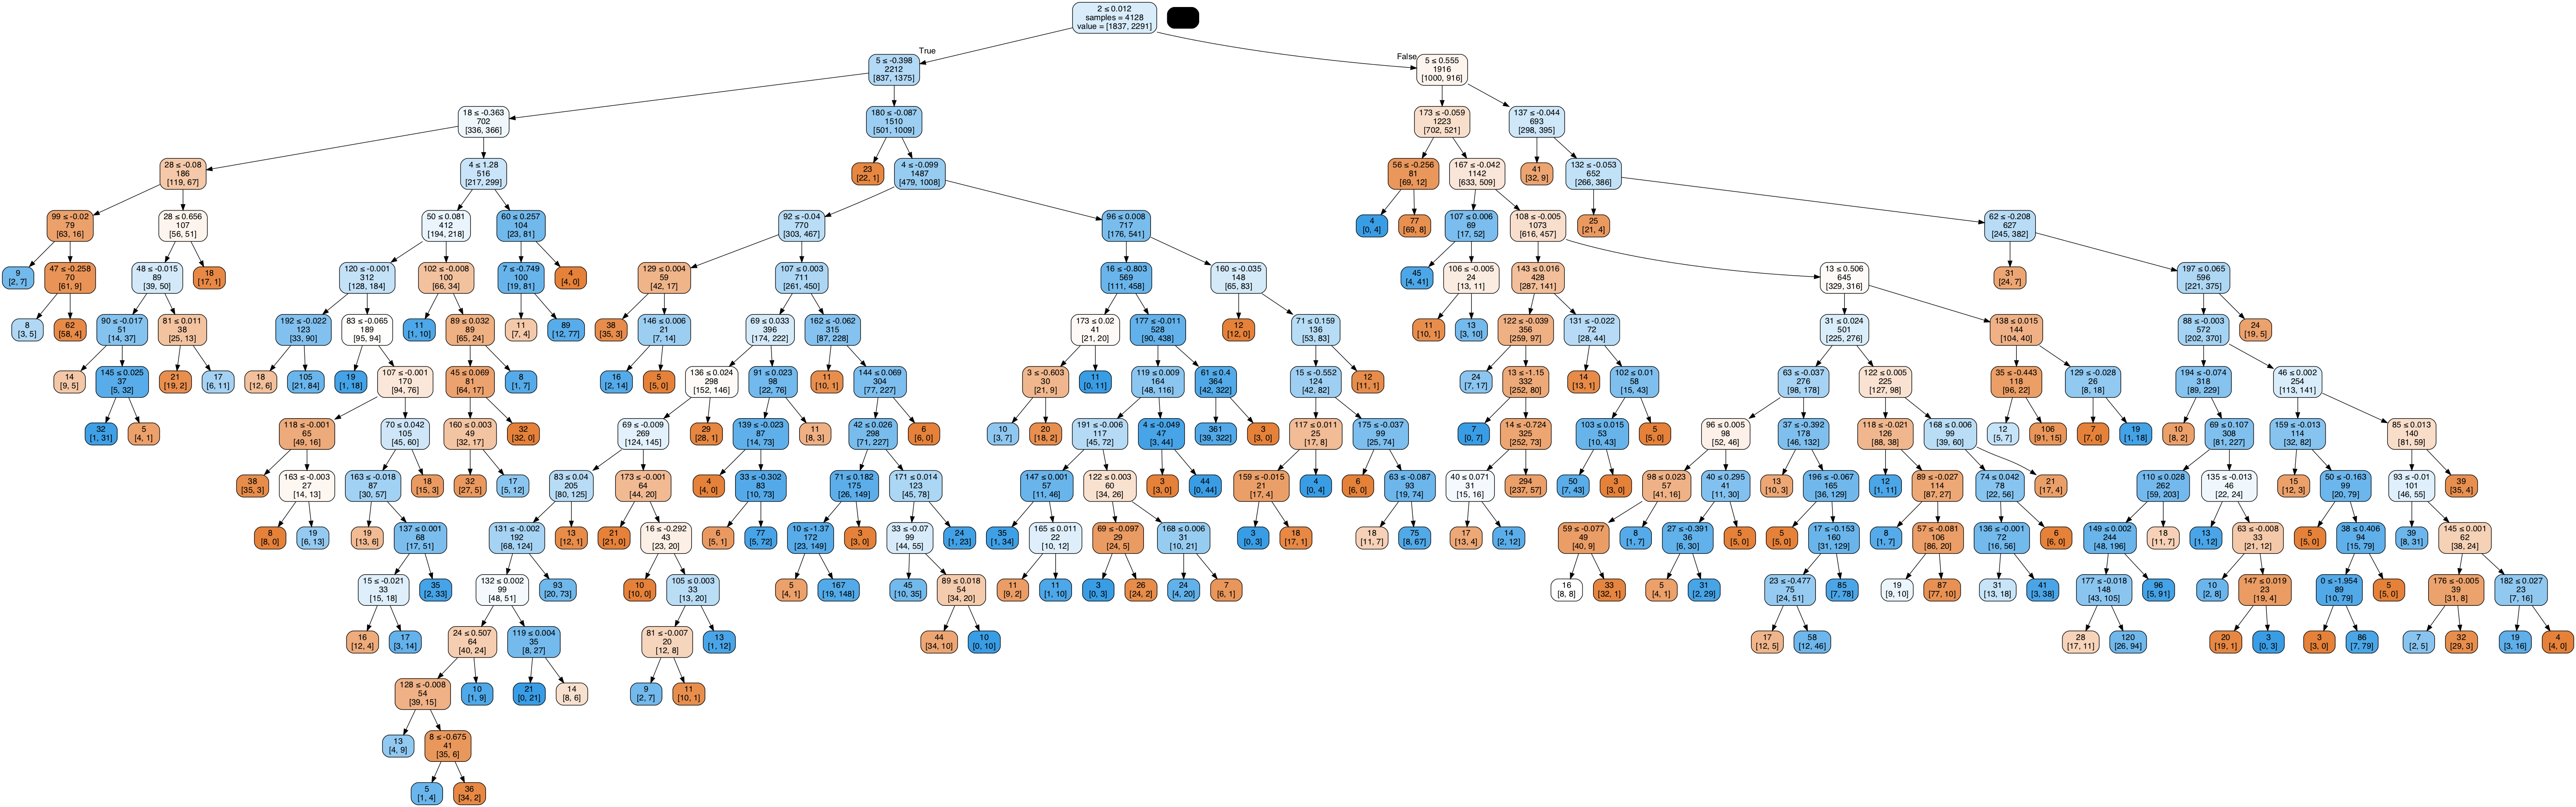

In [51]:
# Create a smaller classification tree for training partition
# using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 20;
#  - Minimum impurity decrease per split = 0 
#  - Minimum number of sample records in a node for splitting = 30.   
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.001, min_samples_split=20)
smallClassTree.fit(train_X_pca200, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X_pca200.columns)

In [52]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, smallClassTree.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.6385420773926569


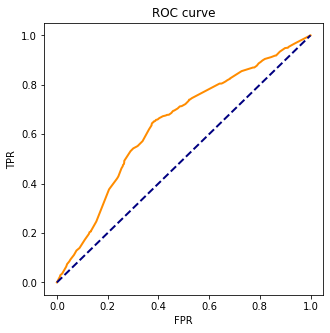

In [53]:
roc_auc_score(valid_y, smallClassTree.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, smallClassTree.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [54]:
# Confusion matrices for smaller classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Smaller Tree with control parameters')
classificationSummary(train_y, smallClassTree.predict(train_X_pca200))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Smaller Tree with control parameters')
classificationSummary(valid_y, smallClassTree.predict(valid_X_pca200))
print(classification_report(valid_y, smallClassTree.predict(valid_X_pca200)))


Training Partition for Smaller Tree with control parameters
Confusion Matrix (Accuracy 0.8588)

       Prediction
Actual    0    1
     0 1519  318
     1  265 2026

Validation Partition for Smaller Tree with control parameters
Confusion Matrix (Accuracy 0.6311)

       Prediction
Actual   0   1
     0 476 341
     1 312 641
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       817
           1       0.65      0.67      0.66       953

    accuracy                           0.63      1770
   macro avg       0.63      0.63      0.63      1770
weighted avg       0.63      0.63      0.63      1770



<AxesSubplot:>

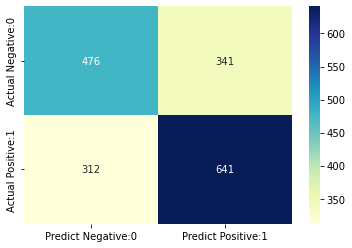

In [55]:
cm = confusion_matrix(valid_y, smallClassTree.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Smaller Classification tree using Grid Search results

In [56]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(10, 30)),  
    'min_impurity_decrease': [0.0005, 0.001], 
    'min_samples_split': list(range(10, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X_pca200, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.6328
Improved parameters:  {'max_depth': 11, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


Best Classification Tree with Grid Search


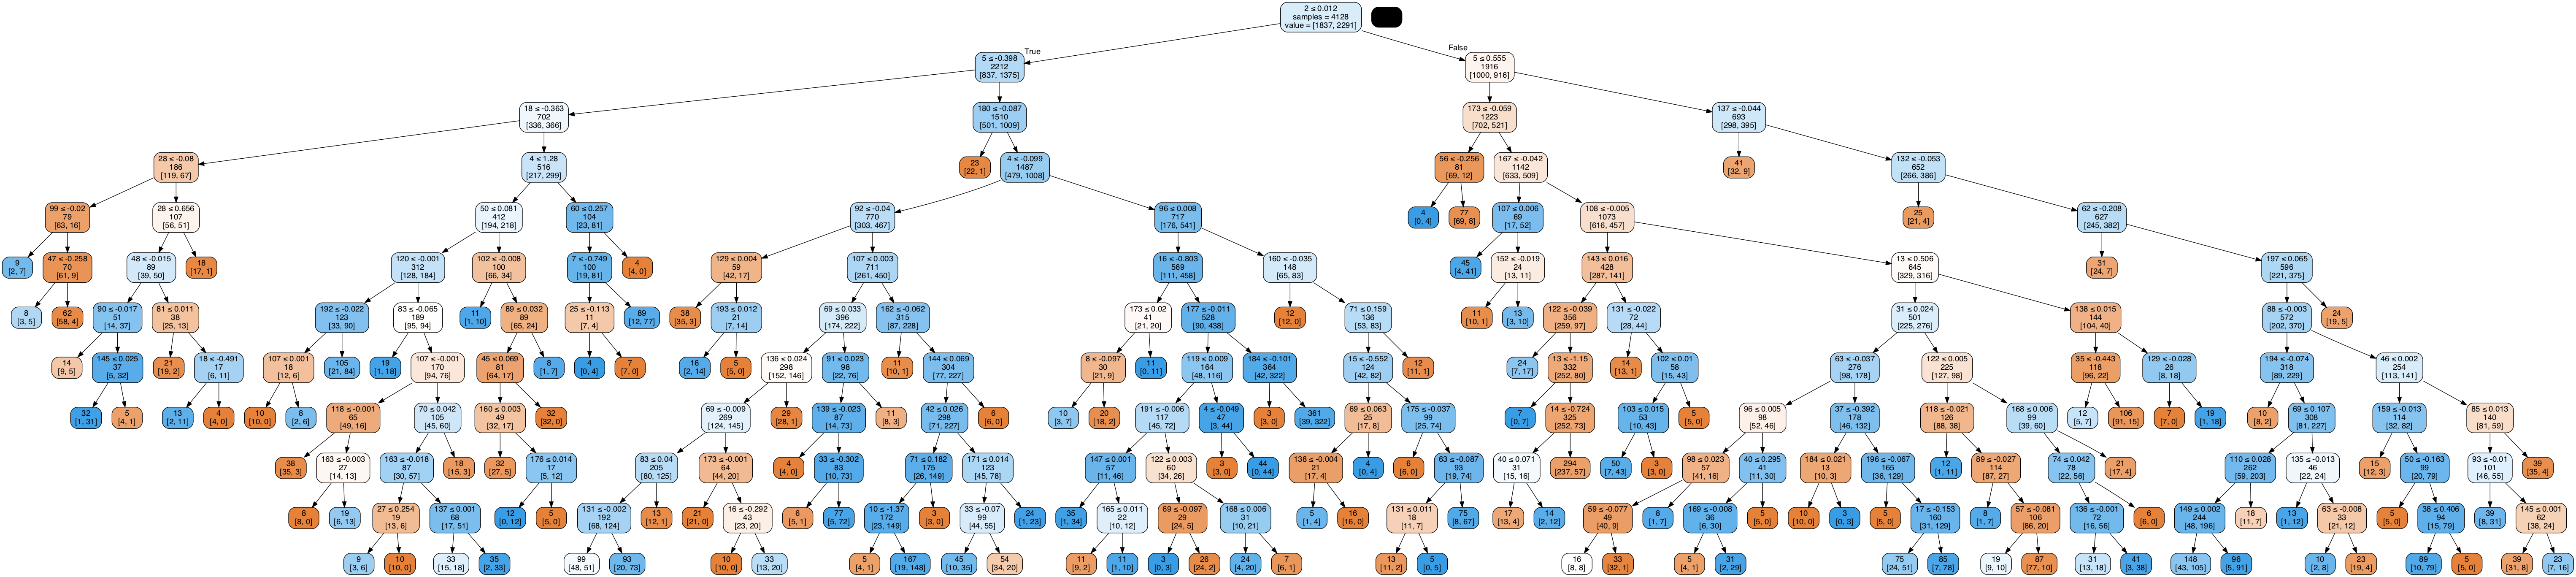

In [57]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X_pca200.columns)

In [58]:
# Identify and display number of nodes in the tree
# based on grid search.
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 267


In [59]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.6304442198250452


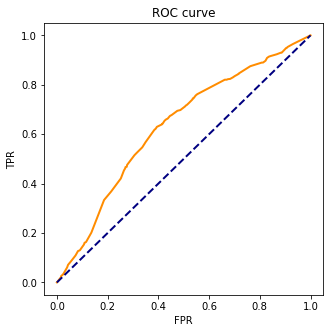

In [60]:
roc_auc_score(valid_y, gridSearch.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, gridSearch.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [61]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for classification tree based on grid search')
classificationSummary(train_y, bestClassTree.predict(train_X_pca200))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for classification tree based on grid search')
classificationSummary(valid_y, bestClassTree.predict(valid_X_pca200))
print(classification_report(valid_y, bestClassTree.predict(valid_X_pca200)))

Training Partition for classification tree based on grid search
Confusion Matrix (Accuracy 0.8445)

       Prediction
Actual    0    1
     0 1424  413
     1  229 2062

Validation Partition for classification tree based on grid search
Confusion Matrix (Accuracy 0.6164)

       Prediction
Actual   0   1
     0 429 388
     1 291 662
              precision    recall  f1-score   support

           0       0.60      0.53      0.56       817
           1       0.63      0.69      0.66       953

    accuracy                           0.62      1770
   macro avg       0.61      0.61      0.61      1770
weighted avg       0.61      0.62      0.61      1770



<AxesSubplot:>

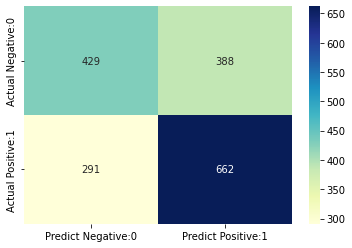

In [62]:
cm = confusion_matrix(valid_y, bestClassTree.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Random Forest trees

In [74]:
# Apply RandomForestClassifier() function to develop a combined
# (ensemble) classification tree using Random Forest algorithm.
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(train_X_pca200, train_y)

# Display number of nodes in Random Forest trees.
n_nodes = rf.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes)

Number of Nodes in Tree in Random Forest: 943


In [75]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, rf.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.8372780153120789


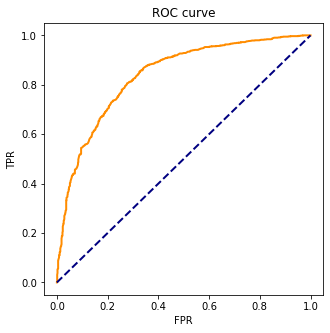

In [76]:
roc_auc_score(valid_y, rf.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, rf.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [77]:
# Confusion matrices for Random Forest classification. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Random Forest Tree')
classificationSummary(train_y, rf.predict(train_X_pca200))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Random Forest Tree')
classificationSummary(valid_y, rf.predict(valid_X_pca200))
print(classification_report(valid_y, rf.predict(valid_X_pca200)))


Training Partition for Random Forest Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition for Random Forest Tree
Confusion Matrix (Accuracy 0.7706)

       Prediction
Actual   0   1
     0 551 266
     1 140 813
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       817
           1       0.75      0.85      0.80       953

    accuracy                           0.77      1770
   macro avg       0.78      0.76      0.77      1770
weighted avg       0.77      0.77      0.77      1770



<AxesSubplot:title={'center':'Confusion Matrix'}>

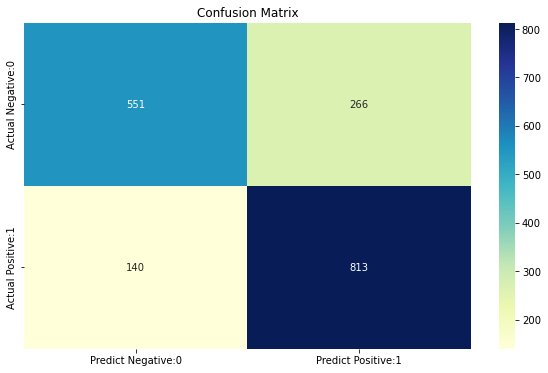

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
cm = confusion_matrix(valid_y, rf.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Random forest along with grid search

In [83]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(10, 30)),  
    'min_impurity_decrease': [0.0005, 0.001], 
    'min_samples_split': list(range(10, 30)),
    #'min_samples_leaf': list(range(1,3)),
    #'max_samples': [0.7]
    'random_state':[1]
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch_rand = GridSearchCV(RandomForestClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch_rand.fit(train_X_pca200, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch_rand.best_score_:.4f}')
print('Improved parameters: ', gridSearch_rand.best_params_)


Improved score:0.7449
Improved parameters:  {'max_depth': 20, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20, 'random_state': 1}


In [84]:
# Create classification tree based on the improved parameters.
bestrandTree = gridSearch_rand.best_estimator_


In [87]:
# Display number of nodes in Random Forest trees.
n_nodes_r = bestrandTree.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes_r)

Number of Nodes in Tree in Random Forest: 361


In [88]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_rand.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.8281802874643109


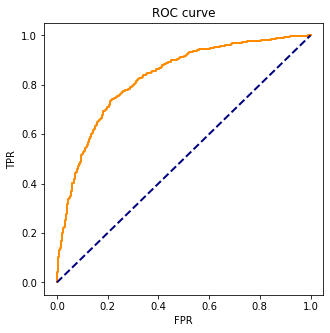

In [89]:
roc_auc_score(valid_y, gridSearch_rand.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, gridSearch_rand.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [90]:
# Confusion matrices for Random Forest classification. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Random Forest Tree')
classificationSummary(train_y, gridSearch_rand.predict(train_X_pca200))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Random Forest Tree')
classificationSummary(valid_y, gridSearch_rand.predict(valid_X_pca200))
print(classification_report(valid_y, gridSearch_rand.predict(valid_X_pca200)))

Training Partition for Random Forest Tree
Confusion Matrix (Accuracy 0.9641)

       Prediction
Actual    0    1
     0 1725  112
     1   36 2255

Validation Partition for Random Forest Tree
Confusion Matrix (Accuracy 0.7435)

       Prediction
Actual   0   1
     0 492 325
     1 129 824
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       817
           1       0.72      0.86      0.78       953

    accuracy                           0.74      1770
   macro avg       0.75      0.73      0.73      1770
weighted avg       0.75      0.74      0.74      1770



<AxesSubplot:title={'center':'Confusion Matrix'}>

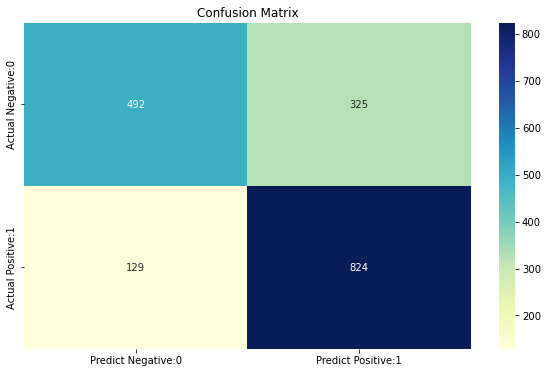

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
cm = confusion_matrix(valid_y, gridSearch_rand.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Boosted Tree

In [92]:
# Apply GradientBoostingClassifier() function to develop a combined
# boosted tree.  
boost = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, random_state=1,
                           subsample=0.7)
boost.fit(train_X_pca200, train_y)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, random_state=1,
                           subsample=0.7)

In [93]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, boost.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.8072440184381988


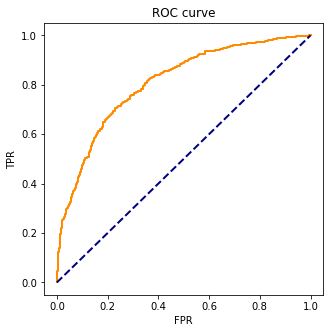

In [94]:
roc_auc_score(valid_y, boost.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, boost.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [95]:
# Confusion matrices for Boosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for Boosted Tree')
classificationSummary(train_y, boost.predict(train_X_pca200))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for Boosted Tree')
classificationSummary(valid_y, boost.predict(valid_X_pca200))
print(classification_report(valid_y, boost.predict(valid_X_pca200)))

Training Partition for Boosted Tree
Confusion Matrix (Accuracy 0.9251)

       Prediction
Actual    0    1
     0 1620  217
     1   92 2199

Validation Partition for Boosted Tree
Confusion Matrix (Accuracy 0.7339)

       Prediction
Actual   0   1
     0 532 285
     1 186 767
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       817
           1       0.73      0.80      0.77       953

    accuracy                           0.73      1770
   macro avg       0.74      0.73      0.73      1770
weighted avg       0.73      0.73      0.73      1770



<AxesSubplot:>

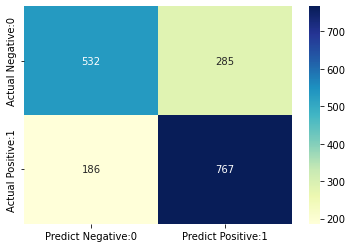

In [96]:
cm = confusion_matrix(valid_y, boost.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# XGboost

In [105]:
xgbc = XGBClassifier(random_state=1,
                n_estimators=500,                
                learning_rate=0.05,      
                subsample=0.7,booster='gbtree')
#print(xgbc)
#XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
#       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
#       n_estimators=100, n_jobs=1, nthread=None,
#       objective='multi:softprob', random_state=0, reg_alpha=0,
#      reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
#      subsample=1, verbosity=1)
xgbc.fit(train_X_pca200, train_y)

[22:43:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, xgbc.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.8413153849018946


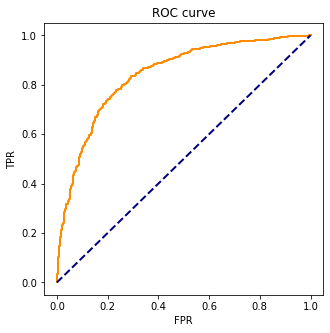

In [107]:
roc_auc_score(valid_y, xgbc.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, xgbc.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [108]:
# Confusion matrices for XGBoosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for XGBoosted Tree')
classificationSummary(train_y, xgbc.predict(train_X_pca200))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for XGBoosted Tree')
classificationSummary(valid_y, xgbc.predict(valid_X_pca200))
print(classification_report(valid_y, xgbc.predict(valid_X_pca200)))

Training Partition for XGBoosted Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition for XGBoosted Tree
Confusion Matrix (Accuracy 0.7734)

       Prediction
Actual   0   1
     0 585 232
     1 169 784
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       817
           1       0.77      0.82      0.80       953

    accuracy                           0.77      1770
   macro avg       0.77      0.77      0.77      1770
weighted avg       0.77      0.77      0.77      1770



<AxesSubplot:>

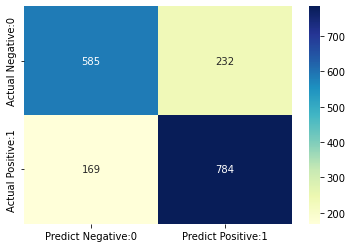

In [109]:
cm = confusion_matrix(valid_y, xgbc.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# XGBoost along with grid search

In [110]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'reg_lambda': [1, 3, 5, 10] 
}

# Apply GridSearchCV() fucntion for various combinations of
# GradientBoostingClassifier() improved parameters. 
gridSearch_XGboost = GridSearchCV(XGBClassifier(n_estimators=500,reg_alpha = 1,max_depth=6,learning_rate=0.05,      
                subsample=0.7,booster='gbtree',random_state=1), 
                param_grid, cv=5, n_jobs=-1)
gridSearch_XGboost.fit(train_X_pca200, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch_XGboost.best_score_:.4f}')
print('Improved parameters: ', gridSearch_XGboost.best_params_)

[23:06:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Improved score:0.7614
Improved parameters:  {'learning_rate': 0.05, 'reg_lambda': 3}
[22:44:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed fro

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[22:44:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[22:44:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[22:44:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[22:44:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[22:44:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[22:44:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

In [111]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_XGboost.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.8417995866945972


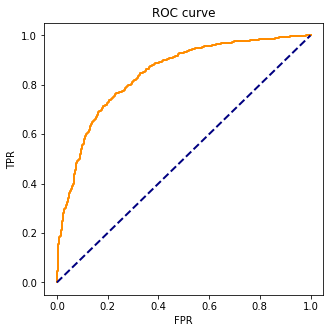

In [112]:
roc_auc_score(valid_y, gridSearch_XGboost.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, gridSearch_XGboost.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [113]:
# Confusion matrices for XGBoosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for XGBoosted Tree')
classificationSummary(train_y, gridSearch_XGboost.predict(train_X_pca200))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for XGBoosted Tree')
classificationSummary(valid_y, gridSearch_XGboost.predict(valid_X_pca200))
print(classification_report(valid_y, gridSearch_XGboost.predict(valid_X_pca200)))

Training Partition for XGBoosted Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition for XGBoosted Tree
Confusion Matrix (Accuracy 0.7588)

       Prediction
Actual   0   1
     0 582 235
     1 192 761
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       817
           1       0.76      0.80      0.78       953

    accuracy                           0.76      1770
   macro avg       0.76      0.76      0.76      1770
weighted avg       0.76      0.76      0.76      1770



<AxesSubplot:>

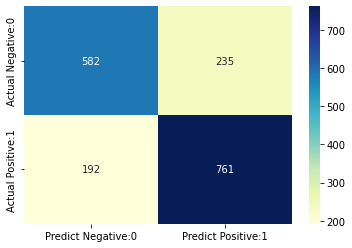

In [114]:
cm = confusion_matrix(valid_y, gridSearch_XGboost.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# LightGBM

In [115]:
lgbmc = LGBMClassifier(random_state=1,
                n_estimators=500,                
                learning_rate=0.05,      
                subsample=0.7)
lgbmc.fit(train_X_pca200, train_y)


LGBMClassifier(learning_rate=0.05, n_estimators=500, random_state=1,
               subsample=0.7)

In [116]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, lgbmc.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.8330865231357268


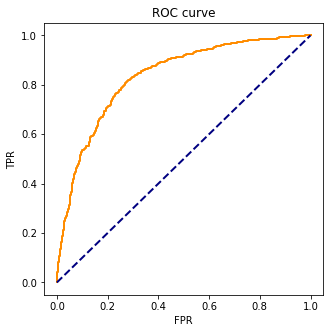

In [117]:
roc_auc_score(valid_y, lgbmc.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, lgbmc.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [118]:
classificationSummary(train_y, lgbmc.predict(train_X_pca200))

classificationSummary(valid_y, lgbmc.predict(valid_X_pca200))
print(classification_report(valid_y, lgbmc.predict(valid_X_pca200)))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291
Confusion Matrix (Accuracy 0.7718)

       Prediction
Actual   0   1
     0 585 232
     1 172 781
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       817
           1       0.77      0.82      0.79       953

    accuracy                           0.77      1770
   macro avg       0.77      0.77      0.77      1770
weighted avg       0.77      0.77      0.77      1770



<AxesSubplot:>

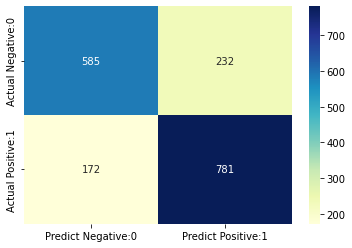

In [119]:
cm = confusion_matrix(valid_y, lgbmc.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# LightGBM with Gridsearch

In [120]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'reg_lambda': [1, 3, 5, 10] 
}

# Apply GridSearchCV() fucntion for various combinations of
# GradientBoostingClassifier() improved parameters. 
gridSearch_LGBM = GridSearchCV(LGBMClassifier(n_estimators=500,reg_alpha = 1,max_depth=6,learning_rate=0.05,      
                subsample=0.7,booster='gbtree',random_state=1), 
                param_grid, cv=5, n_jobs=-1)
gridSearch_LGBM.fit(train_X_pca200, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch_LGBM.best_score_:.4f}')
print('Improved parameters: ', gridSearch_LGBM.best_params_)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Improved score:0.7534
Improved parameters:  {'learning_rate': 0.1, 'reg_lambda': 3}
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unkn

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't expl

In [121]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_LGBM.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.8341962057587904


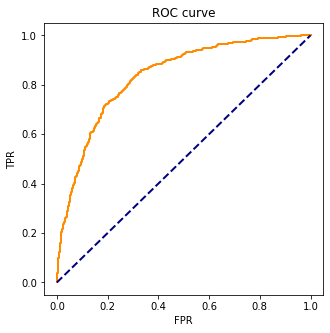

In [122]:
roc_auc_score(valid_y, gridSearch_LGBM.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, gridSearch_LGBM.predict_proba(valid_X_pca200)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [123]:
classificationSummary(train_y, gridSearch_LGBM.predict(train_X_pca200))

classificationSummary(valid_y, gridSearch_LGBM.predict(valid_X_pca200))
print(classification_report(valid_y, gridSearch_LGBM.predict(valid_X_pca200)))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291
Confusion Matrix (Accuracy 0.7638)

       Prediction
Actual   0   1
     0 586 231
     1 187 766
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       817
           1       0.77      0.80      0.79       953

    accuracy                           0.76      1770
   macro avg       0.76      0.76      0.76      1770
weighted avg       0.76      0.76      0.76      1770



<AxesSubplot:>

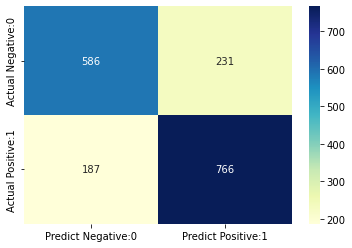

In [124]:
cm = confusion_matrix(valid_y, gridSearch_LGBM.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Neural Network Model

## <font color= "Orange">Different Neural Network Models:
<ol>
  <font color= "Blue"><li>Neural Network Model using multiple Predictors</li>
      <li>Neural Network Model Based on Grid Search</li>
</ol>

## Neural network Model 

In [85]:
# Create outcome and predictors to run neural network
# model.
#outcome = 'bichoice'
#drop = ['bichoice','highway','town','state','home_park']
#predictors = [c for c in EV_intention_df.columns if c != drop]


# Create predictors and outcome variables.  
#X = EV_intention_df.drop(columns=['bichoice','state','zipcode'])
#y = EV_intention_df['bichoice']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the EV_intention_df data frame.
#train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
#                            test_size=0.2, random_state=1)

# Use MLPCclassifier() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (20); 
# (b) single hidden layer with 3 nodes (default is 2); 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (2);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
EV_intention_clf = MLPClassifier(hidden_layer_sizes=(3), max_iter=10000,activation='logistic',
                    solver='lbfgs', random_state=1)
EV_intention_clf.fit(train_X_pca200, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for EV intention Neural Network Model')
print(EV_intention_clf.intercepts_)

print()
print('Network Weights for EV intention Neural Network Model')
print(EV_intention_clf.coefs_)

Final Intercepts for EV intention Neural Network Model
[array([-43.61274052,  12.36736027,   1.60971161]), array([1.31381615])]

Network Weights for EV intention Neural Network Model
[array([[ 4.45957049e+00, -3.59340224e+00,  1.20589141e+01],
       [-4.07696052e+00, -1.87027114e+00,  3.48779438e+00],
       [-2.15755457e+01,  6.97291783e+00, -6.04974362e+01],
       [ 1.25548830e+01,  1.53498578e+01,  2.49871429e+01],
       [-1.99908197e+01, -1.27634710e+01, -1.26115994e+01],
       [-2.17466756e+01, -7.14586883e+00,  6.18275156e+00],
       [ 2.41046177e+00, -1.21799970e+01, -1.24640160e+01],
       [ 1.65697917e+01, -4.54320062e+00, -1.90489199e+01],
       [-1.24300651e+01,  1.28829188e+01,  5.94496624e+00],
       [-1.14759806e+01,  2.63117355e+01,  2.70598288e+01],
       [-2.75732667e+01, -1.39544894e+00, -1.71145443e+01],
       [-2.31315510e+01,  6.12632330e-01, -4.63333341e+01],
       [ 2.02334195e+01, -1.02370058e+01,  2.46627762e+01],
       [-1.84844564e+01,  3.61088052

In [86]:
# Make Ev intention classification for validation set 
# using EV intention neural network model. 

# Use EV_intention_clf model to classify EV intention
# for validation set.
EV_Intention_pred = EV_intention_clf.predict(valid_X_pca200)

# Predict target probabilities p(0), p(1),
# and p(2) for validation set.
EV_pred_prob = np.round(EV_intention_clf.predict_proba(valid_X_pca200), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
EV_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in EV_pred_prob],
                'p(1)': [p[1] for p in EV_pred_prob],
                'Classification': EV_Intention_pred})

print('Classification for EV intention data for Validation Partition')
print(EV_pred_result.head(10))

Classification for EV intention data for Validation Partition
      Actual    p(0)    p(1)  Classification
573        1  0.2118  0.7882               1
3219       1  0.1998  0.8002               1
4436       0  0.8127  0.1873               0
3887       1  0.0159  0.9841               1
3656       1  0.0159  0.9841               1
3680       1  0.8127  0.1873               0
1513       1  0.2195  0.7805               1
79         1  0.2118  0.7882               1
4072       1  0.0159  0.9841               1
3259       0  0.2118  0.7882               1


In [87]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, EV_intention_clf.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.6544006493698313


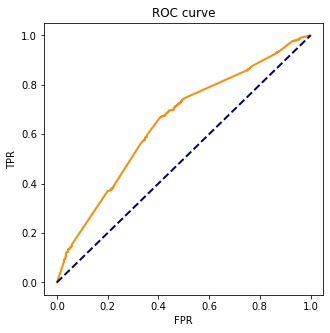

In [88]:
roc_auc_score(valid_y, EV_intention_clf.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, EV_pred_prob[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [89]:
# Confusion matrices for EV intention neural network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, EV_intention_clf.predict(train_X_pca200))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, EV_intention_clf.predict(valid_X_pca200))
print(classification_report(valid_y, EV_intention_clf.predict(valid_X_pca200)))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8285)

       Prediction
Actual    0    1
     0 1415  422
     1  286 2005

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.6271)

       Prediction
Actual   0   1
     0 446 371
     1 289 664
              precision    recall  f1-score   support

           0       0.61      0.55      0.57       817
           1       0.64      0.70      0.67       953

    accuracy                           0.63      1770
   macro avg       0.62      0.62      0.62      1770
weighted avg       0.63      0.63      0.62      1770



<AxesSubplot:>

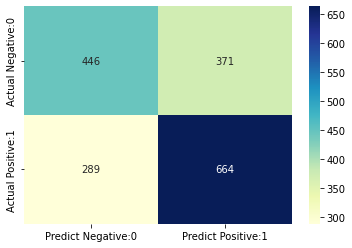

In [90]:
cm = confusion_matrix(valid_y, EV_intention_clf.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Neural network Model using Grid Search

In [91]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X_pca200, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.7098
Best parameter:  {'hidden_layer_sizes': 5}


In [92]:
# Use MLPCclassifier() function to train the improved neural network model
# based on grid search results. 

# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (20); 
# (b) single hidden layer with 10 nodes based on grid search; 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (2);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
EV_clf_imp = MLPClassifier(hidden_layer_sizes=(5), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
EV_clf_imp.fit(train_X_pca200, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for EV intention Neural Network Model based on grid search')
print(EV_clf_imp.intercepts_)

print()
print('Network Weights for EV intention Neural Network Model based on grid search')
print(EV_clf_imp.coefs_)

Final Intercepts for EV intention Neural Network Model based on grid search
[array([ 49.3552063 ,  24.51428577,   5.32531609, -42.13091699,
        59.45965364]), array([9.57235937])]

Network Weights for EV intention Neural Network Model based on grid search
[array([[-2.54625266e+01,  1.37630209e+01, -2.25504212e+01,
         1.91642381e+01, -1.77569503e+01],
       [-4.51423673e+00,  8.16334078e+00, -4.28695195e+00,
        -5.28869210e-01,  1.34165556e+00],
       [ 2.24188982e+01,  6.22643320e+01, -3.89058722e+01,
         6.79897004e+00,  2.47366809e+01],
       [-5.82404517e+00,  3.38602423e+01, -3.14292519e+01,
         1.89335342e+01, -1.08989689e+01],
       [-1.57624480e+01,  1.48184069e+01, -1.52638099e+01,
         1.41514759e+01,  2.38705766e+01],
       [-1.00669469e+01,  6.61759452e+00, -2.00438112e+01,
         4.12323955e+00,  2.22554953e+01],
       [-1.80625512e+01,  2.10405875e+01, -2.22718802e+01,
         1.41934178e+01, -1.03352078e+00],
       [-7.65608551e+00, 

In [93]:
# Make EV intention classification for validation set 
# using EV intention neural network model. 

# Use EV_clf_imp model to classify EV intention
# for validation set.
EV_pred_imp = EV_clf_imp.predict(valid_X_pca200)

# Predict EV intention probabilities p(0), p(1),
# and p(2) for validation set.
EV_pred_prob_imp = np.round(EV_clf_imp.predict_proba(valid_X_pca200), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
EV_pred_imp_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in EV_pred_prob_imp],
                'p(1)': [p[1] for p in EV_pred_prob_imp],
                'Classification': EV_pred_imp})

print('Classification for EV intention Data for Validation Partition')
print(EV_pred_imp_result.head(10))

Classification for EV intention Data for Validation Partition
      Actual    p(0)    p(1)  Classification
573        1  0.1594  0.8406               1
3219       1  0.0620  0.9380               1
4436       0  0.9974  0.0026               0
3887       1  0.1281  0.8719               1
3656       1  0.1281  0.8719               1
3680       1  0.8266  0.1734               0
1513       1  0.9709  0.0291               0
79         1  0.1059  0.8941               1
4072       1  0.9791  0.0209               0
3259       0  0.9613  0.0387               0


In [94]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, EV_clf_imp.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

0.7317104653089324


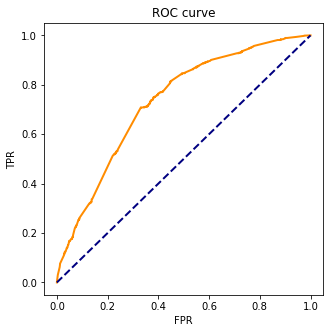

In [95]:
roc_auc_score(valid_y, EV_clf_imp.predict_proba(valid_X_pca200)[:,1])

fpr, tpr, _ = roc_curve(valid_y, EV_pred_prob_imp[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [96]:
# Confusion matrices for improved neural network model for EV intention
# using grid search results. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model based on grid search')
classificationSummary(train_y, EV_clf_imp.predict(train_X_pca200))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model based on grid search')
classificationSummary(valid_y, EV_clf_imp.predict(valid_X_pca200))
print(classification_report(valid_y, EV_clf_imp.predict(valid_X_pca200)))

Training Partition for Neural Network Model based on grid search
Confusion Matrix (Accuracy 0.9046)

       Prediction
Actual    0    1
     0 1600  237
     1  157 2134

Validation Partition for Neural Network Model based on grid search
Confusion Matrix (Accuracy 0.6887)

       Prediction
Actual   0   1
     0 507 310
     1 241 712
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       817
           1       0.70      0.75      0.72       953

    accuracy                           0.69      1770
   macro avg       0.69      0.68      0.68      1770
weighted avg       0.69      0.69      0.69      1770



<AxesSubplot:>

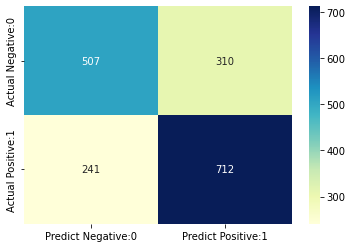

In [97]:
cm = confusion_matrix(valid_y, EV_clf_imp.predict(valid_X_pca200))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')